In [1]:
import numpy as np
import random
from random import sample
import math
from statistics import mean

In [2]:
z= 125*1e-11 # Degradation thereshold
def state(amount):


  if (amount<z):
    state=0      #work

  if (amount >z):
    state=1 # fail

  return state

In [3]:
state(1e-11)

0

In [4]:
cost=np.matrix([[-1,-11],[-51,-61]])
cost

matrix([[ -1, -11],
        [-51, -61]])

In [21]:
z=125*1e-11
mu_beta=8.4823*1e-15
sigma_beta=6.0016*1e-16
mu_y=1e-10
sigma_y=2*1e-11
lamda_shock=2.5*1e-5
def Environment(Degradation,action,tov):
    if (Degradation >= z) and (action==0):
        next_state=1
        reward=cost[next_state,action]
        Degradation =Degradation

    if (Degradation < z and action==0): #do nothing

        n=np.random.poisson(lamda_shock*tov,1)#number of efective shock
        #print(n)
        w=np.random.normal(1.2,0.2,int(n))
        if any([x>1.5 for x in w]) :
                next_state=1
                reward=cost[next_state,action]
                Degradation =130*1e-11
        else:
                y=np.random.normal(mu_y,sigma_y,int(n))
                magnitude = sum(y)
                Degradation = Degradation+ magnitude + (np.random.normal(mu_beta,sigma_beta) * tov)
                next_state=state(Degradation)
                reward=cost[next_state,action]

    if ( action==1 ): #replace

        n=np.random.poisson(lamda_shock*tov,1)#number of efective shock
        #print(n)
        w=np.random.normal(1.2,0.2,int(n))
        if any([x>1.5 for x in w]) :
                next_state=1
                reward=cost[next_state,action]
                Degradation =130*1e-11
        else:
                y=np.random.normal(mu_y,sigma_y,int(n))
                magnitude = sum(y)
                Degradation = magnitude + (np.random.normal(mu_beta,sigma_beta) * tov)
                next_state=state(Degradation)
                reward=cost[next_state,action]



    return (next_state,reward,Degradation)

In [22]:
Environment(0,1,10**5)

(0, -11, 1.0961378923689307e-09)

In [23]:
tov=1.05*(10**5)
Degradation = 0
results = []
for i in range(5):
    action = 0
    next_state ,reward,Degradation = Environment(Degradation , action,tov)
    results.append(Degradation)

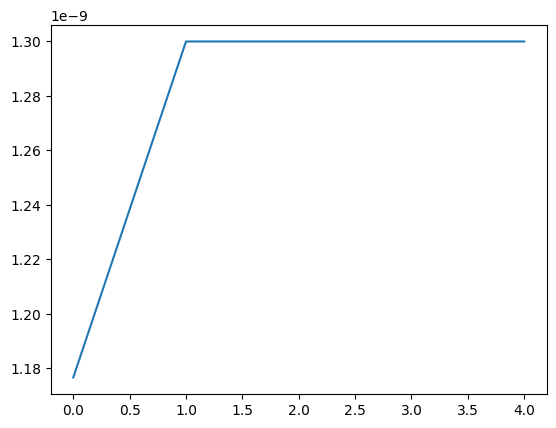

In [24]:

import matplotlib.pyplot as plt
plt.plot(results)
plt.show()

In [25]:
def choose_action(epsilon, state):
    if (np.random.random() < epsilon):
        return random.choice([0,1])
    else:
        return np.argmax(Q_table[state])

In [26]:
#my_score=[]
tau_list = [105000,110000,115000,120000,125000,130000,135000,140000,145000,150000]
q_table_list=[]
for t in tau_list:
    tov=t
    epsilon = 1
    learning_rate = 1
    discount = 0.5
    Degradation=0
    Q_table = np.zeros((2,2)) #1

    scores = []


# Looping for each episode
    for e in range(1000): #2
    # Initializes the state
        current_state = 0 #it is new #3

        rewards = []


    # Looping for each step
        for j in range(int(40000000//tov)):#4
        # Choose A from S
            action = choose_action(epsilon,current_state) #5
        #print(action)
        # Take action
            next_state ,immediate_reward,Degradation = Environment(Degradation,action,tov) #6
            rewards.append(immediate_reward)
            new_state = next_state

        # Update Q(S,A)
            Q_table[current_state][action] += (learning_rate *
                                        (immediate_reward
                                         + discount * np.max(Q_table[new_state])
                                         - Q_table[current_state][action])) #7

            current_state = new_state #8

        learning_rate *= 0.99
        epsilon *= 0.99
        scores.append(sum(rewards))
    #my_score.append(mean(scores))
    print(t)
    #print(Q_table)
    q_table_list.append(Q_table)


105000
110000
115000
120000
125000
130000
135000
140000
145000
150000


In [28]:
for i in range(10):
    print("tov is",tau_list[i])
    print((q_table_list[i]))
    print("--------------------------")

tov is 105000
[[-80.19026641 -57.91734737]
 [-80.18499991 -57.89573582]]
--------------------------
tov is 110000
[[-84.33159829 -66.66818389]
 [-84.40722436 -66.92244653]]
--------------------------
tov is 115000
[[-89.29237537 -77.12549852]
 [-89.36179608 -76.9876861 ]]
--------------------------
tov is 120000
[[-94.45658383 -86.46253889]
 [-94.91523762 -86.61806072]]
--------------------------
tov is 125000
[[ -99.39153488 -100.03325047]
 [-100.85585661  -96.74544765]]
--------------------------
tov is 130000
[[-101.99273053 -103.0167983 ]
 [-102.         -103.8446776 ]]
--------------------------
tov is 135000
[[-101.9988338  -109.06152879]
 [-102.         -105.84143446]]
--------------------------
tov is 140000
[[-101.99997645 -105.39115112]
 [-102.         -107.67616249]]
--------------------------
tov is 145000
[[-101.99999856 -111.82147453]
 [-102.         -109.48358183]]
--------------------------
tov is 150000
[[-101.99999997 -109.91638134]
 [-102.         -111.3901606 ]]
---